# Manga


In [1]:
(ns tasteless-lagoon
  (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

nil

In [2]:
(defn manga![img]
  (-> img
  	 (cvt-color! COLOR_RGB2GRAY)
  	 ;(gaussian-blur! (new-size 7 7) 1.5 1.5)
  	 (threshold! 100 255 THRESH_BINARY)))

#'tasteless-lagoon/manga!

In [3]:
(defn lookup-mat [_gamma] 
  (let[lut-mat (new-mat 1 256 CV_8UC1) ]
    (doseq [i (range 1 256)]  
      (.put lut-mat 0 i (double-array [(int (* 255 (Math/pow (/ i 255) (/ 1 _gamma))) )] )))
    lut-mat))

(defn gamma [img _gamma]
 (let [ out (clone img)]
  (lut img (lookup-mat _gamma) out)
   out))

#'tasteless-lagoon/gamma

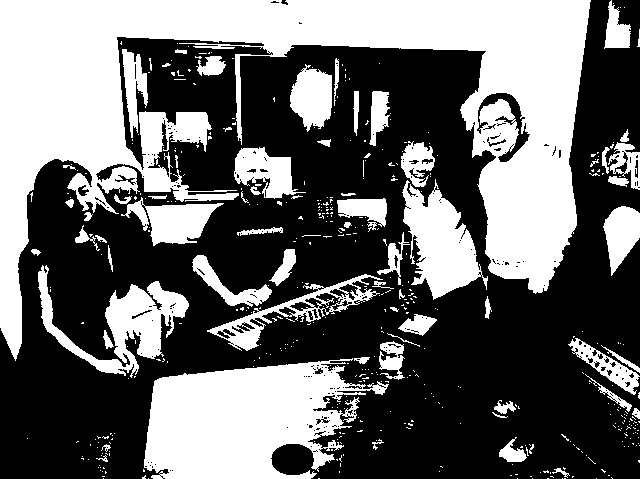

In [4]:
(-> 
  "resources/IMG_20190308_090345_917.jpg" 
  (imread) 
  (u/resize-by 0.5)
  (gamma 1.6) 
;  (gaussian-blur! (new-size 3 3) 1.0 1.0)
  (manga!) 
  (u/>>>))